<a href="https://colab.research.google.com/github/Jionee/AI_colorization/blob/main/Image_Colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Image Colorization

##### Importing Library


In [1]:
import os
import cv2
from keras.layers import Conv2D, UpSampling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

from keras.utils.np_utils import to_categorical

##### Mounting Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Loading Image Dataset

In [2]:
train_path = './drive/MyDrive/testData'
test_path = './drive/MyDrive/testValidation'
#print(os.listdir("./drive/MyDrive/Colab Notebooks/Train/"))

#Normalize images
test_datagen = train_datagen = ImageDataGenerator(rescale=1./255)
#Resize images, if needed
train = train_datagen.flow_from_directory(train_path,target_size=(256,256),batch_size=300,class_mode=None)
test = test_datagen.flow_from_directory(test_path,target_size=(256,256),batch_size=100,class_mode=None)

#Convert from RGB to LAB
def generateDataset(imgs):
  X = []
  Y = []
  for img in imgs[0]:
    try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128) #for normalize -1 to 1
    except:
      print('error')
  X = np.array(X)
  Y = np.array(Y)
  X = X.reshape(X.shape+(1,)) #X and Y dimension should be same
  return [X,Y]
  
[X_train,Y_train] = generateDataset(train)
[X_test,Y_test] = generateDataset(test)

Found 300 images belonging to 1 classes.
Found 100 images belonging to 1 classes.


##### Constructing Model

In [17]:
from keras.models import Sequential, Model
from keras import optimizers
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout,BatchNormalization
from keras.optimizers import Adam

inputs = Input(shape=(256,256,1))
x = inputs
#encoder
_x = Conv2D(64, 3, activation='relu', padding='same')(x) 
_x = Conv2D(64, 3, activation='relu', padding='same')(_x) 
x = _x
_x = Conv2D(128, 3, activation='relu', padding='same')(x) 
_x = Conv2D(128, 3, activation='relu', padding='same')(_x) 
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x


_x = Conv2D(256, 3, activation='relu', padding='same')(x) 
_x = Conv2D(256, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x)  
x = x + _x
_x = Conv2D(512, 3, activation='relu', padding='same')(x) 
_x = Conv2D(512, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x)   
x = x + _x

#decoder
_x = Conv2D(256, 3, activation='relu', padding='same')(x) 
_x = Conv2D(256, 3, activation='relu', padding='same')(_x) 
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x
_x = Conv2D(128, 3, activation='relu', padding='same')(x) 
_x = Conv2D(128, 3, activation='relu', padding='same')(_x) 
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x


_x = Conv2D(64, 3, activation='relu', padding='same')(x) 
_x = Conv2D(64, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x
_x = Conv2D(32, 3, activation='relu', padding='same')(x) 
_x = Conv2D(32, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x
_x = Conv2D(16, 3, activation='relu', padding='same')(x) 
_x = Conv2D(16, 3, activation='relu', padding='same')(_x)
_x = Conv2D(64, 1, activation='relu', padding='same')(x) 
x = x + _x
x = Conv2D(2, 3, activation='tanh', padding='same')(x) 
outputs = x
model = Model(inputs, outputs)
LEARNING_RATE = 0.001
model.compile(optimizer=Adam(lr=LEARNING_RATE), loss='mean_squared_error', metrics=['accuracy'])
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 256, 256, 64) 4160        conv2d_1[0][0]                   
_______________________________________________________________________________________

##### Model Training

In [18]:
fitModel = model.fit(X_train,Y_train, epochs=50, batch_size=15, validation_data=(X_test,Y_test))

Epoch 1/50
20/20 [==============================] - 8s 392ms/step - loss: 0.9636 - accuracy: 0.6402 - val_loss: 0.9794 - val_accuracy: 0.6086
Epoch 2/50
20/20 [==============================] - 8s 387ms/step - loss: 0.9634 - accuracy: 0.5925 - val_loss: 0.9682 - val_accuracy: 0.3946
Epoch 3/50
20/20 [==============================] - 8s 387ms/step - loss: 0.9453 - accuracy: 0.3568 - val_loss: 1.0219 - val_accuracy: 0.3940
Epoch 4/50
20/20 [==============================] - 8s 381ms/step - loss: 0.9705 - accuracy: 0.5426 - val_loss: 0.9805 - val_accuracy: 0.6061
Epoch 5/50
20/20 [==============================] - 7s 374ms/step - loss: 0.9732 - accuracy: 0.6431 - val_loss: 0.9794 - val_accuracy: 0.6060
Epoch 6/50
20/20 [==============================] - 7s 372ms/step - loss: 0.9287 - accuracy: 0.6429 - val_loss: 0.0534 - val_accuracy: 0.6042
Epoch 7/50
20/20 [==============================] - 7s 371ms/step - loss: 0.0203 - accuracy: 0.6418 - val_loss: 0.0126 - val_accuracy: 0.6055
Epoch 

##### Plotting Accuracy


In [20]:
'''
def visModel():
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.plot(fitModel.history['accuracy'])
  plt.plot(fitModel.history['val_accuracy'])
  plt.legend(['training', 'validation'], loc = 'upper left')
  plt.show()
'''
def visModel():
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.plot(fitModel.history['accuracy'])
  plt.plot(fitModel.history['val_accuracy'])
  plt.plot(fitModel.history['loss'])
  plt.plot(fitModel.history['val_loss'])
  plt.legend(['training', 'validation'], loc = 'upper left')
  plt.show()

##### Model Save & Caculating Accuracy

4/4 [==============================] - 1s 130ms/step - loss: 0.0120 - accuracy: 0.6055
Test accuracy:  [0.011988634243607521, 0.6054556369781494]


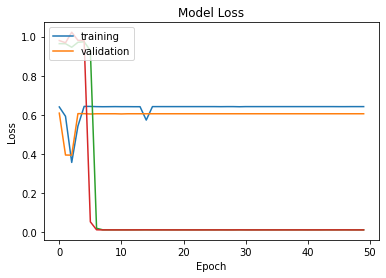

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./sample_data/variables/colorize_autoencoder.model/assets


In [21]:
#model_accuracy
results = model.evaluate(X_test, Y_test)

print('Test accuracy: ', results)

#visualization Model
visModel()

#save
model.save('./sample_data/variables/colorize_autoencoder.model')

##### PSNR 

In [5]:
import math
import numpy

# def calPSNR (img1,img2):
#   mse=numpy.mean((img1-img2)**2)
#   if mse==0:
#     return 100
#   PIXEL_MAX=255.0
#   return 20*math.log10(PIXEL_MAX/math.sqrt(mse))

  # 케라스 psnr 평가 metric 예시
def calPSNR(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=1.0)

##### Result Images

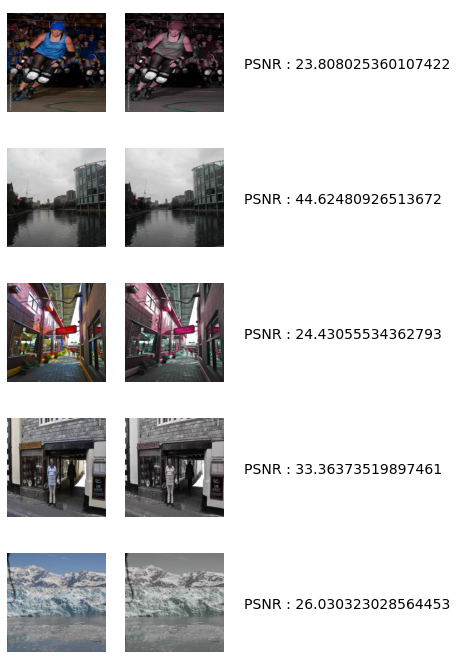

In [28]:
model = tf.keras.models.load_model(
    './sample_data/variables/colorize_autoencoder.model',
    custom_objects=None,
    compile=True
)

output = model.predict(X_test)
output = output*128 # (1, 256, 256, 2)

result = np.zeros((100,256,256,3))
result[:,:,:,0] = X_test[:,:,:,0] #L
#result[:,:,:,1:] = Y_test[:,:,:,0:] *128 #AB
#result[:,:,:,1] = Y_test[:,:,:,0] *128 #AB
# result[:,:,:,2] = Y_test[:,:,:,1] *128 #AB
#result[:,:,:,1] = output[:,:,:,0] *128 #AB
#result[:,:,:,2] = output[:,:,:,1] *128 #AB
#result[:,:,:,1:] = output #AB
pred_Imgs = [lab2rgb(result[i]) for i in range(100)]
# imsave("result.png",lab2rgb(result))

plt.figure(figsize=(6,12))
plt.title("Test vs Predicted Test")
i=1
for j in range(5):
  j=j
  #j = np.random.randint(0,99)
  plt.subplot(5,3,i)
  plt.axis('off')
  plt.imshow(test[0][j])
  plt.subplot(5,3,i+1)
  plt.axis('off')
  plt.imshow(pred_Imgs[j])
  #plt.imshow(Y_test[0])
  plt.subplot(5,3,i+2)
  plt.axis('off')


  PSNR = calPSNR(test[0][j],pred_Imgs[j])
  plt.text(0,0.45,f"PSNR : {PSNR}",fontsize=14)
  i += 3
  #print("\nPSNR :" ,PSNR)

In [45]:
print("===result==========================")
print(result.shape)
print(result[0])
print("===test_imgs==========================")
print(test[0][0])
print("===pred_imgs==========================")
print(pred_Imgs[0])



===result==========================
(100, 256, 256, 3)
[[[83.25895779  0.24808709  1.89874506]
  [83.61743085  1.76642382  1.62433803]
  [83.97558553  1.76642382  1.62433803]
  ...
  [75.91015295  1.76642382  1.62433803]
  [75.91015295  1.76642382  1.62433803]
  [75.91015295  1.99757111  1.50831091]]

 [[83.25895779 -1.33008718  4.75932217]
  [83.61743085  1.17706895  5.62599945]
  [83.97558553  1.17706895  5.62599945]
  ...
  [77.0053632   1.17706895  5.62599945]
  [77.0053632   1.17706895  5.62599945]
  [77.0053632   1.585832    3.21573615]]

 [[83.25895779 -1.33008718  4.75932217]
  [83.61743085  1.17706895  5.62599945]
  [84.33341751  1.17706895  5.62599945]
  ...
  [78.09735936  1.17706895  5.62599945]
  [78.46065037  1.17706895  5.62599945]
  [78.46065037  1.585832    3.21573615]]

 ...

 [[20.75886986 -1.33008718  4.75932217]
  [23.94316922  1.17706895  5.62599945]
  [28.38583986  1.17706895  5.62599945]
  ...
  [30.75511876  1.17706895  5.62599945]
  [30.75511876  1.17706895  5